In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #Skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [ ]:
data = pd.read_csv('/content/Dataset-Tugas.csv')
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.shape

(150, 5)

In [ ]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
data.drop(columns='class', inplace=True)

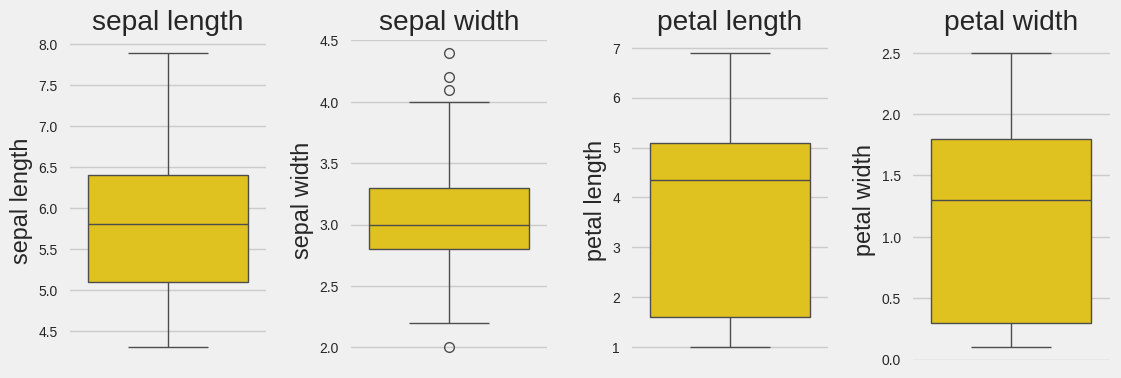

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
  #Definisikan variabel yang akan divisualisasikan
  variables = data.select_dtypes(exclude='object').columns

  # Buat figure dan axes untuk subplot dengan ukuran 1x3
  fig, axes = plt.subplots(1,4 , figsize=(12,4)) #sesuaikan ukuran figure
  fig.subplots_adjust(hspace=0.4, wspace=0.4) #Atur jarak antar subplot

  # Iterasi melalui setiap variabel dan buat boxplot
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color="gold", ax=axes[i]) #perhatikan perubahan disini
    axes[i].set_title(var) #Tambahkan judul untuk setiap plot

  #Tampilkan plot
  plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

**Interpretasi**

Boxplot ini menunjukkan variasi empat variabel pada dataset iris: panjang sepal, lebar sepal, panjang petal, dan lebar petal. Median panjang sepal sekitar 6 cm dengan rentang data 4.5–8 cm, sedangkan lebar sepal memiliki median 3 cm dengan beberapa outlier di atas 4 cm. Panjang petal memiliki median 4.5 cm dengan rentang 1–7 cm, sementara lebar petal memiliki median 1.5 cm dengan rentang 0–2.5 cm. Dari keempat variabel ini, hanya lebar sepal yang menunjukkan outlier signifikan, sedangkan lainnya memiliki distribusi yang relatif simetris.

**K-Means**

In [ ]:
# instantiate
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

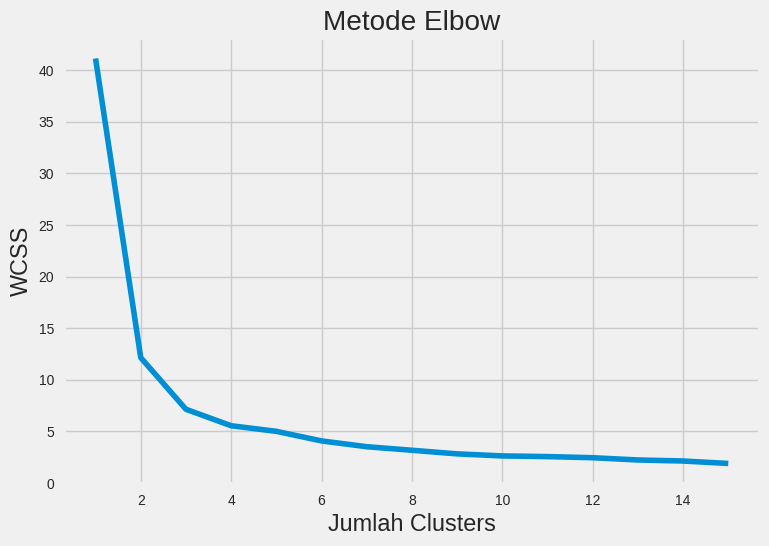

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang cepat
wcss = []
for i in range(1,16):
  kmeans =KMeans(n_clusters= i, init = 'k-means++', random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

**Interpertasi**

Grafik *Elbow Method* ini untuk menentukan jumlah klaster optimal dalam algoritma *K-means*. Sumbu vertikal (WCSS atau *Within-Cluster Sum of Squares*) menunjukkan seberapa jauh data dari pusat klaster, sementara sumbu horizontal menunjukkan jumlah klaster. Dalam grafik ini, terlihat bahwa penurunan WCSS signifikan hingga sekitar 3 klaster, setelah itu penurunan menjadi lebih landai. Titik "siku" atau "elbow" pada grafik ini ada di sekitar klaster ke-3, yang menandakan bahwa 3 klaster adalah jumlah yang optimal, karena menambahkan lebih banyak klaster setelahnya hanya memberikan pengurangan WCSS yang kecil.

In [ ]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
y_pred1 = model1.fit_predict(X_scaled)

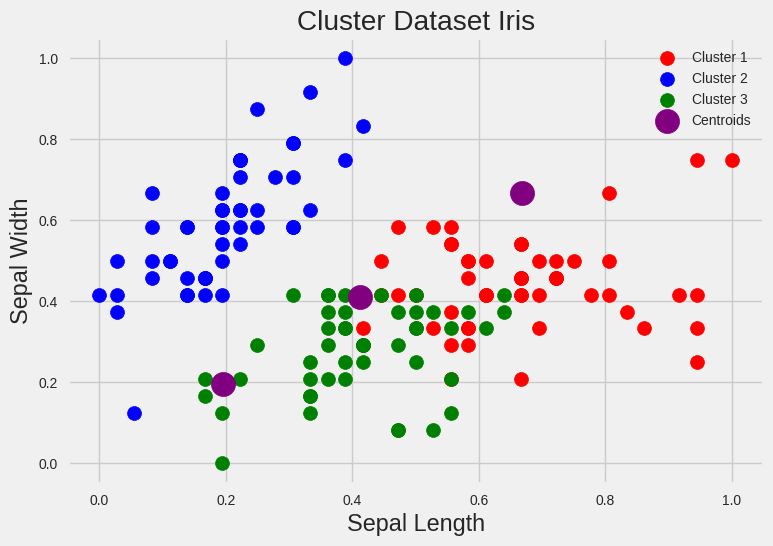

In [ ]:
# Visualisasi hasil clusters

plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_pred1 == 2, 0], X_scaled[y_pred1 == 2, 1],
            s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 0],
            s = 300, c = 'purple', label = 'Centroids')

plt.title('Cluster Dataset Iris')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

**Interpretasi**

Visualisasi ini menunjukkan hasil klasterisasi data iris menggunakan algoritma *K-means*, di mana data dibagi menjadi tiga klaster berdasarkan panjang sepal (sumbu horizontal) dan lebar sepal (sumbu vertikal). Setiap klaster diwakili oleh warna berbeda: merah untuk Klaster 1, biru untuk Klaster 2, dan hijau untuk Klaster 3. Titik-titik ungu besar adalah *centroid* atau pusat dari masing-masing klaster. Data yang berada di sekitar centroid memiliki karakteristik yang mirip. Klasterisasi ini menunjukkan bahwa data dapat dikelompokkan dengan jelas ke dalam tiga klaster, dengan setiap klaster memiliki centroid yang terpisah satu sama lain.

**DBSCAN**

In [ ]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum
model2 = DBSCAN(eps=0.4,min_samples=5)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Tambahkan label tersebut menjadi kolom baru di dataset
data['Hasil_cluster'] = model2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Hasil_cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


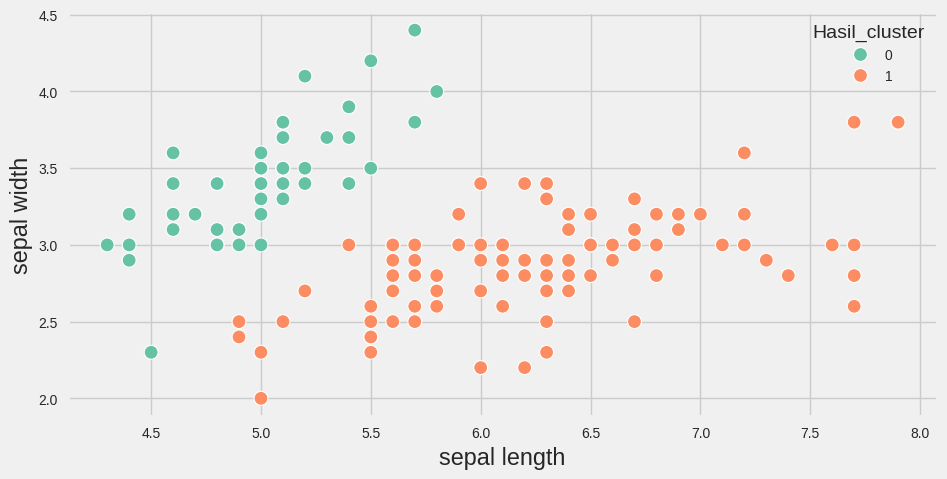

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'sepal length', y = 'sepal width',
                hue = 'Hasil_cluster', data = data, palette = 'Set2', s = 100);

**Interpretasi**

Visualisasi ini menunjukkan dua kelompok iris berdasarkan panjang dan lebar sepalnya. Cluster 0 (hijau) terdiri dari bunga dengan panjang sepal lebih pendek (sekitar 4.5-5.5) dan lebar sepal lebih besar (sekitar 3.0-4.5), sedangkan cluster 1 (oranye) mencakup iris dengan panjang sepal lebih panjang (sekitar 5.5-8.0) dan lebar sepal lebih kecil (sekitar 2.0-3.5). Hal ini menunjukkan bahwa iris dengan karakteristik ukuran sepal berbeda dikelompokkan ke dalam dua kelompok terpisah.

**MATRIKS EVALUASI**

1. Silhoutte Score

In [ ]:
# Menghitung Silhoute_score algoritma k-means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Silhoutte Score: ", Evaluasi_KMeans)

Silhoutte Score:  0.48247222154221125


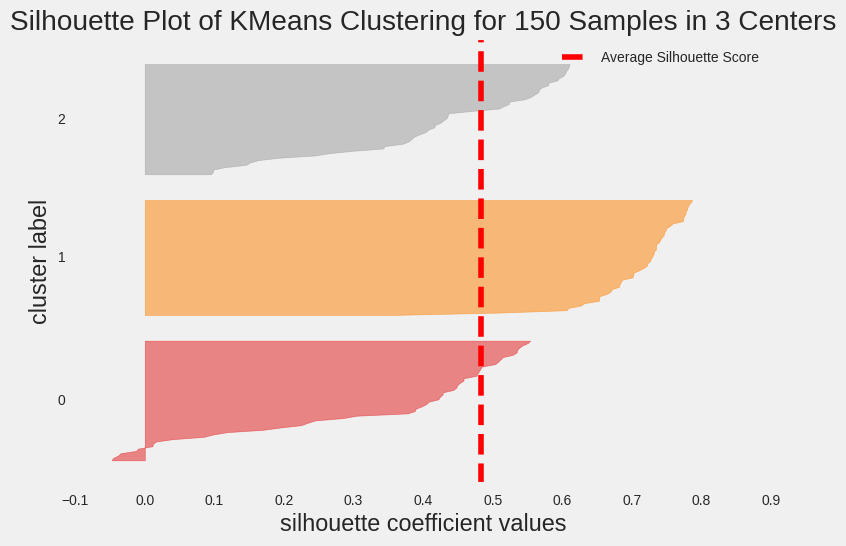

In [ ]:
# Membuat Silhoutte Visualization untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid()
silhouette_viz.show()
plt.show()

**Interpretasi**

Visualisasi ini adalah plot *silhouette* untuk mengukur kualitas pengelompokan (*clustering*) dari algoritma K-Means dengan 3 cluster pada 150 sampel. Setiap bagian berwarna menunjukkan satu cluster, dengan lebar tiap baris menggambarkan nilai *silhouette coefficient* masing-masing sampel dalam cluster tersebut. *Silhouette coefficient* menunjukkan seberapa baik suatu sampel cocok dengan cluster-nya; semakin dekat ke 1, semakin baik pengelompokan tersebut.

Garis putus-putus merah menandakan skor *silhouette* rata-rata dari keseluruhan sampel (sekitar 0.5). Cluster dengan nilai *silhouette* yang lebih tinggi daripada rata-rata menunjukkan pengelompokan yang lebih baik, sementara yang lebih rendah mengindikasikan bahwa sampel-sampel tersebut kurang cocok dengan cluster-nya atau memiliki tumpang tindih dengan cluster lain.

In [ ]:
# Menghitung Silhoutte_score algoritma DBSCAN
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print("Silhoutte Score:", Evaluasi_DBScan)

Silhoutte Score: 0.6294675561906644


**Interpretasi**

*   Silhouette Score mengukur kualitas klaster berdasarkan kedekatan objek dalam klaster dengan objek lainnya dan seberapa jauh klaster tersebut dari klaster lain.
*   K-means memiliki nilai Silhouette yang lebih rendah (0.4825), yang menunjukkan bahwa klaster yang terbentuk dengan k-means mungkin tidak sepenuhnya terpisah atau memiliki objek yang agak dekat dengan klaster lain. Meskipun klasterisasi ini cukup baik, ada potensi overlap atau beberapa objek yang bisa dikelompokkan lebih baik.
*   DBSCAN memiliki nilai Silhouette yang lebih tinggi (0.6295), yang menunjukkan bahwa DBSCAN memberikan klasterisasi yang lebih baik dengan klaster yang lebih terpisah dan lebih rapat. Ini menunjukkan bahwa DBSCAN mampu mengidentifikasi struktur yang lebih jelas dalam data, dengan sedikit overlap antar-klaster.



2. Davies-Bouldin Index (DBI)

In [ ]:
# Menghitung Davies-Bouldin INdex (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.7874978912757878


In [ ]:
# Menghitung Davies-Bouldin INdex (DBI) algoritma DBSCAN
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.48770481288357487


**Interpretasi**


*   Davies-Bouldin Index (DBI) mengukur kualitas klasterisasi berdasarkan sebaran dalam klaster dan jarak antar-klaster. Nilai yang lebih rendah menunjukkan klasterisasi yang lebih baik, dengan klaster yang lebih terpisah dan lebih padat.
*   K-means menghasilkan DBI yang lebih tinggi (0.6295), yang mengindikasikan bahwa klaster-klaster yang terbentuk cenderung memiliki jarak antar-klaster yang lebih kecil atau klaster tersebut tidak cukup padat. Ini menunjukkan bahwa k-means mungkin menghasilkan klaster yang lebih tumpang tindih atau lebih tersebar, yang kurang optimal.
*   DBSCAN memiliki nilai DBI yang lebih rendah (0.4877), yang menunjukkan bahwa DBSCAN berhasil menghasilkan klaster-klaster yang lebih terpisah dan lebih padat dibandingkan dengan k-means. Ini mengindikasikan bahwa DBSCAN dapat menangani klaster dengan bentuk yang lebih kompleks dan distribusi yang lebih bervariasi dengan lebih baik.

**Interpretasi Keseluruhan**

*   DBSCAN secara keseluruhan menunjukkan performa yang lebih baik dalam hal Silhouette Score dan Davies-Bouldin Index (DBI) dibandingkan dengan k-means, yang berarti DBSCAN menghasilkan klaster yang lebih terpisah dan lebih padat, serta lebih baik dalam menangani data yang lebih kompleks (seperti data dengan klaster tidak berbentuk bulat atau dengan kepadatan yang tidak merata).

*   Sedangkan, pada K-means, meskipun memberikan klaster yang relatif baik, masih menghasilkan klaster yang kurang optimal dalam hal pemisahan dan kepadatan, yang tercermin dalam nilai Silhouette dan DBI yang lebih rendah.